In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Compounding Interest

The interest on an investment or a debt is proportional to the amount of money invested or owed and the interest rate. Mathematically, this is similar to population growth. In this notebook, you will calculate the value of an investement with compounded interest and the principal paid on a debt with compounded interest.

# Investment

Suppose you invest $1,000 that earns 7% interest per year, compounded (i.e. computed) daily.

1. How much interest (in %) do you earn after the one day assumer there are 365 days in a year? 
2. How much (total) money do you have in this investment after one day?

Do your calculation below for one day only. A loop is not necessary.

In [2]:
r = .07/365 # rate per day
P = 1000
P = P*r + P
print(r*100,P)

0.019178082191780823 1000.1917808219179


1. You earn 0.019% intrest each day
2. After one day you have \$1000.19

Suppose our goal is to calculate how much your investment (in the previous question) is worth after one year? Describe *how* you have to solve the problem below. A calculation is not necessary.

We would calculate the amount if intrest earned each day (like above). This would be done in a loop, where each iteration of the loop represents one day (i.e. our `dt = 1 day`). In the loop we would also update the current value of the invesment.

### Background

Let's use the variable $P$ for the value of your investment and $r$ for the interest rate. At $t=0$, you invest $P=1000$ dollars. The rate of change in the value of your investment in a time interval $\Delta t$ is:

$$\text{rate of change} = \dot{P} = \frac{\Delta P}{\Delta t} = rP$$

The quantity $rP$ is the money you earn from interest per day (or per unit of time being used). After a time interval $\Delta t$, the value of your investment is

$$P=P+\dot{P}\Delta t$$

This is called *compound interest* because the money earned from interest becomes part of the investment. So, as $P$ increases, the amount of money you earn from interest $\Delta P$ also increases because it is proportional to $P$.

The interest earned is the change in the value of your investment, $\Delta P$. So,

$$\mathrm{INT} = \dot{P}\Delta t$$


### Interest Rate

The growth rate $r$ is the interest rate and has units of $1/time$. Interest is computed (or *compounded*) after a certain time interval. Perhaps it is daily, monthly, or annually. Or, it can be computed *continuously* which  means that $\Delta t$ is very, very small. (A second, an hour, or a day might be small enough to be considered *continuous*, depending on the total time you are considering.)

Sometimes an interest rate is reported *annually* (in the nomenclature this is the **APR** or annual percentage rate) but the interest is computed *continuously*. In this case, the interest rate must be converted to the unit $1/time$ where $time$ is the unit used by in $\Delta t$. For example, if $\Delta t$ is one day, then the interest rate must be converted to a unit of $1/day$.

### Example

Suppose you invest $1,000 that earns 7% interest per year, compounded (i.e. computed) daily.

1. How much (total) money do you have in this investment after one year?
2. How much total interest did you earn after one year?


In [3]:
P = 1000 # value
r = 0.07/365 #APR on a per day basis
dt = 1 #day
t = 0
I = 0 # interest earned

while t < 365:
    rate = r*P
    P = P + rate*dt
    
    INT = rate*dt #interest earned in one day
    I = I + INT #total interest
    t = t + dt

print("After t = {:.0f} days, P = ${:.2f} and the total interest earned = ${:.2f}.".format(t, P, I))
    

After t = 365 days, P = $1072.50 and the total interest earned = $72.50.


The long-term return of the stock market, as measured by the S&P 500 index from 1957-2022 is about 10.15%. For the 20 years ending in 2022 the average annual return of the S&P 500 is 8.19%. ([source](https://www.investopedia.com/ask/answers/042415/what-average-annual-return-sp-500.asp))

In our examples below, I'll generally assume a 7% annual interest rate.

## Exercise 1

College Student A invests $\$1,000$ on her 20th birthday, and the investment earns 7% for the rest of her life. On her 65th birthday, what is her investment worth? (Assume the investment is compounded daily.) The invesment is worth \$23329.02 and the annual return is \$496.20.

If College Student B invests $\$1,000$ on her 30th birthday and the investment earns 7% for the rest of her life, what is her investment worth on her 65th birthday? (Assume the investment is compounded daily.) The invesment is worth \$11585.62 and the annual return is \$302.45.

Inversint ten years earlier almost doubles the value of the invesment.

In [4]:
P = 1000 # value
r = 0.07 #APR on a per year basis
dt = 1/365 # years
t = 30 # age
I = 0 # interest earned

while t < 65:
    rate = r*P
    P = P + rate*dt
    
    INT = rate*dt #interest earned in one day
    I = I + INT #total interest
    t = t + dt

print("At t = {:.0f} years old the invesment is worth, P = ${:.2f} and the total interest earned = ${:.2f}.".format(t, P, I))
print(f"The average annual return is {I/35}")
    

At t = 65 years old the invesment is worth, P = $11585.62 and the total interest earned = $10585.62.
The average annual return is 302.44642626241654


1. What was the average annual return on the investment for each student? The average annual return is the total ammount earned divided by the total number of years.
1. Comment on the extra value obtained by investing 10 years earlier?

## Annual Contributions to an Investment

An investment goal is typically to add a constant amount to your investment every month or every year. This is the concept behind *saving*, of course. 

A good example is a **Roth IRA** where you can invest up to $\$6,500$ per year (*after paying taxes*) and then withdraw the investment, including interest, after retirement and not pay taxes on the interest. The ultimate benefit is obtained if you invest $\$6,500$ per year.

How can we include this in our calculation? In our loop, *after each year*, we have to add a constant 6500 to our investment. This means we will need a *conditional*, `if` statement, in our loop to check whether a year has elapsed.

There are many ways to check that a year has elapsed. I'll show you one way using a *loop counter*. 

Let's assume a college student invests  $\$6,500$ into a Roth IRA on her 20th birthday, and the investment earns 7% for the rest of her life. On every birthday, she adds another $\$6,500$ to her investment. What is her investment worth on her 65th birthday?

After t = 45 years, P = $2142184.12 and the total interest earned = $1849684.12.


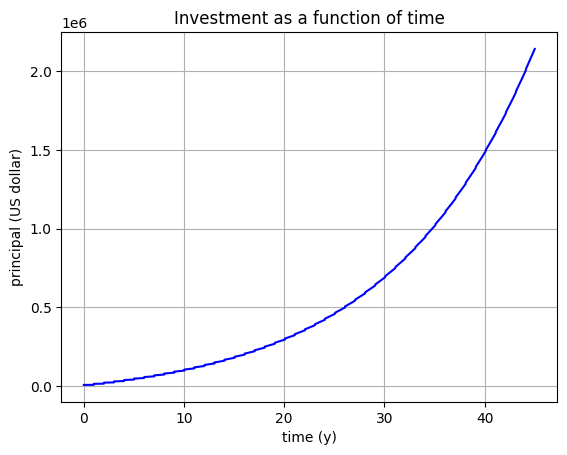

In [5]:
P = 6500
r = 0.07/365 #APR on a per day basis
dt = 1 #day
t = 0
I = 0
years = 65-20 # Total number of years we are investing

tdata = []
Pdata = []

day = 0

while t < years*365:
    rate = r*P
    P = P + rate*dt
    
    INT = rate*dt #interest earned in one day
    I = I + INT #total interest
    
    t = t + dt
    tyears = t /365 # calculate the number of years that have passed

    day = day + 1 #update the day number in a year
    
    if(day>365): 
        day = 0 #reset day to 0
        P = P + 6500 #add 6500 to the investment
    
    tdata.append(tyears)
    Pdata.append(P)

print("After t = {:.0f} years, P = ${:.2f} and the total interest earned = ${:.2f}.".format(tyears, P, I))

fig = plt.figure()
plt.title("Investment as a function of time")
plt.xlabel('time (y)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-')
plt.grid()
plt.show()

## Exercise 3

College Student A invests $\$6,500$ on her 20th birthday and adds $\$6,000$ on every birthday until she is 65. The investment earns 7% for the rest of her life. On her 65th birthday, what is her investment worth? (Assume the investment is compounded daily.)

College Student B invests $\$6,500$ on her 30th birthday and adds $\$6,000$ on every birthday until she is 65. The investment earns 7% for the rest of her life. On her 65th birthday, what is her investment worth? (Assume the investment is compounded daily.)

1. How much more did Student A earn?
2. How much more did Student A invest?

In [6]:
AEarned = 1718565.24
AInvested = 1989065.24 - AEarned

BEarned = 732960.26
BInvested = 943460.26 - BEarned

earned = AEarned - BEarned
invested = AInvested - BInvested
print(f"A earned $ {earned} more")
print(f"A invested $ {invested} more")

A earned $ 985604.98 more
A invested $ 60000.0 more


After t = 35 years, P = $943460.26 and the total interest earned = $732960.26.


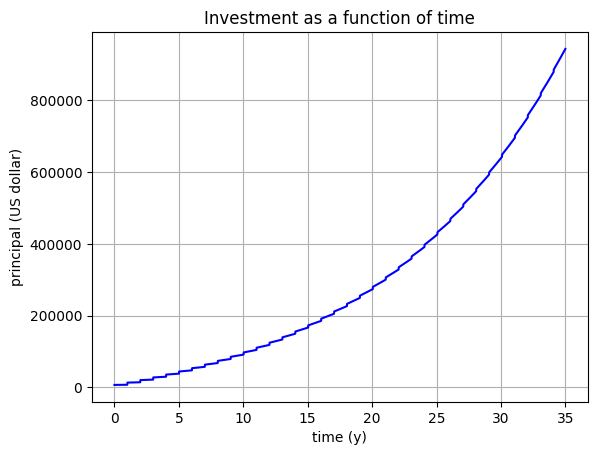

In [7]:
P = 6500
r = 0.07/365 #APR on a per day basis
dt = 1 #day
t = 0
I = 0
years = 65-30 # Total number of years we are investing

tdata = []
Pdata = []

day = 0

while t < years*365:
    rate = r*P
    P = P + rate*dt
    
    INT = rate*dt #interest earned in one day
    I = I + INT #total interest
    
    t = t + dt
    tyears = t /365 # calculate the number of years that have passed

    day = day + 1 #update the day number in a year
    
    if(day>365): 
        day = 0 #reset day to 0
        P = P + 6000 #add 6000 to the investment
    
    tdata.append(tyears)
    Pdata.append(P)

print("After t = {:.0f} years, P = ${:.2f} and the total interest earned = ${:.2f}.".format(tyears, P, I))

fig = plt.figure()
plt.title("Investment as a function of time")
plt.xlabel('time (y)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-')
plt.grid()
plt.show()

# Debt

Suppose you take out a loan to purchase a house for $\$200,000$. The interest rate on the debt is compounded monthly at a rate of 5% per year. You pay $\$1,000$ per month. How long will it be before you pay off the house?

### Background

The loan amount is called the principal which we will call $P$. The interest you owe is part of the monthly payment. The interest you owe in a time interval $\Delta t$ is:

$$INT = rP\Delta t$$

At the end of each month, you pay principal and interest that sums to your monthly payment, which is \$1,000 in this example. So the amount of money that goes to principal in a given month is

$$\Delta P = 1000 - INT$$

And your new principal after this payment is:

$$P=P-\Delta P$$

### Example

1. You purchase a home for \$200,000 at an annual rate of 8% compounded monthly, and your monthly payment is \$1,000. During the first month, how much do you pay on the principal of the loan, and how much do you pay in interest?
2. During the second month, how much do you pay in principal and in interest?

In [8]:
P = 200000
r = 0.08/12 #interest rate on a per month basis
dt = 1 #month
t = 0

INT = r *P*dt #interest paid for one month
Ppaid = 1500 - INT
P  = P - Ppaid
t = t + dt
print("Interest = ", INT, "Ppaid = ", Ppaid, "Principal = ", P)

INT = r *P*dt #interest paid for one month
Ppaid = 1500 - INT
P  = P - Ppaid
t = t + dt
print("Interest = ", INT, "Ppaid = ", Ppaid, "Principal = ", P)

Interest =  1333.3333333333335 Ppaid =  166.66666666666652 Principal =  199833.33333333334
Interest =  1332.2222222222224 Ppaid =  167.7777777777776 Principal =  199665.55555555556


## Exercise 4

Modify the code below to match the home loan described above:

1. How long does it take to pay off the loan?
2. Plot the interest paid per month as a function of time.
3. Plot the principal paid per month as a function of time on the same graph as the interest paid per month.
4. How much did your pay for the home?
5. How do your answers change if the interest is compounded daily?

It takes y off the loan. We paid \$430,917.69 for the home. If we compound the interest daily the home costs \$446,614.45.

After t = 462 months, the principle, P = $-385.55 and the total interest paid = $246614.45.


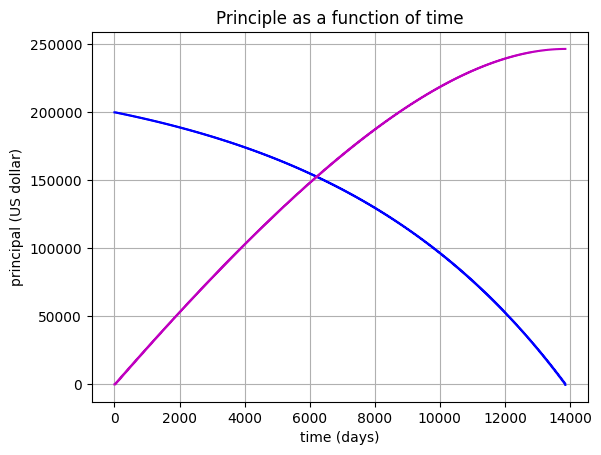

In [10]:
P = 200000 #Principle
r = 0.05/365 #APR on a per month
dt = 1 #day
t = 0
I = 0
INT = 0

tdata = []
Pdata = []
Idata = []

day = 0
while P > 0:
    
    INT += r *P*dt #interest paid for one month
    day = day+1
    
    if day > 30:
        day = 0
        Ppaid = 1000 - INT
        P  = P - Ppaid
        I = I + INT #total interest
        INT = 0
    
    
    t = t + dt
    
    tdata.append(t)
    Pdata.append(P)
    Idata.append(I)

print("After t = {:.0f} months, the principle, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t/30, P, I))

fig = plt.figure()
plt.title("Principle as a function of time")
plt.xlabel('time (days)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-', label="Principle")
plt.plot(tdata, Idata, 'm-', label="Interest")
plt.grid()
plt.legend
plt.show()

# Exercise 5
For a \$200,000 loan at an annual rate of 8% compounded monthly:

1. What should be the payment in order to pay it off in 30 y?

The payment should be \$1470 per month.

After t = 30 years, the principle, P = $-722.99 and the total interest paid = $325537.01.


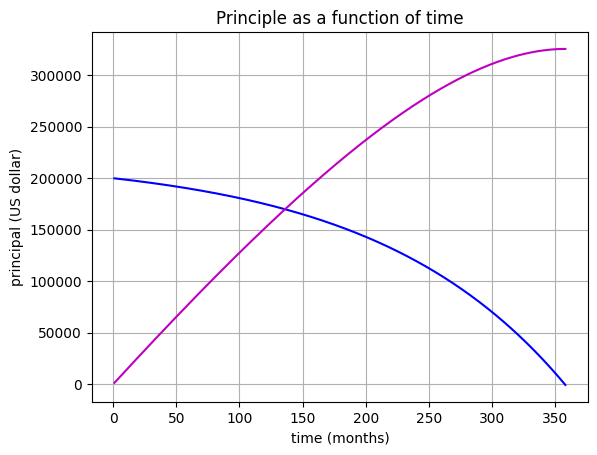

In [22]:
P = 200000 #Principle
r = 0.08/12 #APR on a per month
payment = 1470
dt = 1 #day
t = 0
I = 0

tdata = []
Pdata = []
Idata = []

day = 0
while P > 0:
    
    INT = r *P*dt #interest paid for one month
    Ppaid = payment - INT
    P  = P - Ppaid
    I = I + INT #total interest
    
    
    t = t + dt
    
    tdata.append(t)
    Pdata.append(P)
    Idata.append(I)

print("After t = {:.0f} years, the principle, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t/12, P, I))

fig = plt.figure()
plt.title("Principle as a function of time")
plt.xlabel('time (months)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-', label="Principle")
plt.plot(tdata, Idata, 'm-', label="Interest")
plt.grid()
plt.legend
plt.show()